<a href="https://colab.research.google.com/github/IvanLisun/Pryk_analiz_indz1/blob/main/clustering_groups_of_hobbies%20%D0%BF%D1%804.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
rainbowgirl_clustering_categorical_peoples_interests_path = kagglehub.dataset_download('rainbowgirl/clustering-categorical-peoples-interests')

print('Data source import complete.')


100%|██████████| 192k/192k [00:00<00:00, 50.1MB/s]

Extracting files...
Data source import complete.


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

###### Bibilioteques :

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [5]:
path = "/content/kaggle_Interests_group.csv"

data = pd.read_csv(path)

In [6]:
data

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
6336,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6337,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6338,I,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN


In [7]:
data.describe()

,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,interest9,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
count,6340.000000,993.0,1.0,35.0,25.0,798.000000,3394.000000,1.0,93.0,333.000000,...,118.000000,110.0,5037.000000,2474.000000,877.000000,2.0,72.0,4943.000000,4058.000000,147.0
mean,37.312303,1.0,1.0,1.0,1.0,1.001253,1.000589,1.0,1.0,1.003003,...,1.008475,1.0,1.000596,1.000808,1.002281,1.0,1.0,1.000202,1.000246,1.0
std,15.729872,0.0,NaN,0.0,0.0,0.035400,0.024271,NaN,0.0,0.054800,...,0.092057,0.0,0.024400,0.028427,0.047727,0.0,0.0,0.014223,0.015698,0.0
min,1.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
25%,28.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
50%,39.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
75%,48.000000,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.000000,...,1.000000,1.0,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.0
max,104.000000,1.0,1.0,1.0,1.0,2.000000,2.000000,1.0,1.0,2.000000,...,2.000000,1.0,2.000000,2.000000,2.000000,1.0,1.0,2.000000,2.000000,1.0


##### Cleaning data

1. drop columns who have more than 5000 missed values

In [8]:
data.isna().sum()

,0
group,0
grand_tot_interests,0
interest1,5347
interest2,6339
interest3,6305
...,...
interest213,6338
interest214,6268
interest215,1397
interest216,2282


In [9]:
def drop_missing_values_columns(data , threshold) :
    list_of_index = []
    columns= list(data.isna().sum().index)
    for i in range (len(list(data.isna().sum().values))) :
        if list(data.isna().sum().values)[i]>threshold :
            list_of_index.append(i)
    list_of_columns_to_drop = []
    for i in  (list_of_index) :
        list_of_columns_to_drop.append(columns[i])
    data.drop(list_of_columns_to_drop , axis = 1 , inplace = True)
    return data

In [10]:
df = data.copy()
df1 = drop_missing_values_columns(df , 1000)


In [11]:
df1

,group,grand_tot_interests,interest47,interest58,interest59,interest78,interest80,interest83,interest110,interest162,interest183
0,C,17,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,1.0
1,C,43,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,C,27,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,C,34,1.0,1.0,NaN,NaN,1.0,1.0,1.0,1.0,1.0
4,C,36,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6336,I,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6337,I,48,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
6338,I,38,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


2. fillna the missing values with the median :

In [12]:
columns = list(df1.columns)
columns.remove("group")
for col in columns :
    median = df1[col].median()
    df1[col].fillna(1-median ,  inplace = True)

<ipython-input-12-4e6035686cac>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].fillna(1-median ,  inplace = True)


In [13]:
df1.isna().sum()

,0
group,0
grand_tot_interests,0
interest47,0
interest58,0
interest59,0
interest78,0
interest80,0
interest83,0
interest110,0
interest162,0


3. encoding categorical data

we have just the first column is categorical

In [14]:
le=LabelEncoder()
df1["group"]=le.fit_transform(df1["group"] )


In [15]:
df1.corr()

,group,grand_tot_interests,interest47,interest58,interest59,interest78,interest80,interest83,interest110,interest162,interest183
group,1.000000,-0.020517,0.027894,0.009533,0.011503,0.046126,-0.000423,0.019785,0.020478,0.007178,0.000676
grand_tot_interests,-0.020517,1.000000,0.660940,0.611460,0.695865,0.518824,0.571126,0.529816,0.656748,0.440508,0.358816
interest47,0.027894,0.660940,1.000000,0.766907,0.736945,0.520897,0.584568,0.648224,0.774659,0.524302,0.432013
interest58,0.009533,0.611460,0.766907,1.000000,0.705833,0.489540,0.600243,0.715385,0.791952,0.606765,0.485164
interest59,0.011503,0.695865,0.736945,0.705833,1.000000,0.516403,0.560037,0.557510,0.745706,0.455944,0.369101
interest78,0.046126,0.518824,0.520897,0.489540,0.516403,1.000000,0.487954,0.467830,0.555186,0.361243,0.251577
interest80,-0.000423,0.571126,0.584568,0.600243,0.560037,0.487954,1.000000,0.559020,0.615217,0.472657,0.372485
interest83,0.019785,0.529816,0.648224,0.715385,0.557510,0.467830,0.559020,1.000000,0.696496,0.734150,0.607571
interest110,0.020478,0.656748,0.774659,0.791952,0.745706,0.555186,0.615217,0.696496,1.000000,0.570293,0.459888
interest162,0.007178,0.440508,0.524302,0.606765,0.455944,0.361243,0.472657,0.734150,0.570293,1.000000,0.635296


it is clear that we have many feature who are fully correlated, so we will drop them

In [16]:
df2 = df1[["group" , "grand_tot_interests" , "interest47"]]
df2

,group,grand_tot_interests,interest47
0,0,17,1.0
1,0,43,1.0
2,0,27,1.0
3,0,34,1.0
4,0,36,1.0
...,...,...,...
6335,1,53,1.0
6336,1,48,1.0
6337,1,48,1.0
6338,1,38,1.0


In [17]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df2["grand_tot_interests"]=mms.fit_transform(df2[["grand_tot_interests"]])


<ipython-input-17-1041ef60305a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["grand_tot_interests"]=mms.fit_transform(df2[["grand_tot_interests"]])


In [18]:
df2.skew()

,0
group,0.161317
grand_tot_interests,-0.419963
interest47,-2.350213


In [19]:
Y = df2["group"]
X = df2.drop(["group"] , axis = 1)

# Clustering DATA

1. a grid search for the best K

inertia =  [86.66033861153059, 34.50697730455844, 21.59255089779412, 16.09274415560854, 12.682713507160804, 10.331687506369098, 8.062716753870218, 5.620985777218959, 4.703379586726449, 3.9932533449388976]


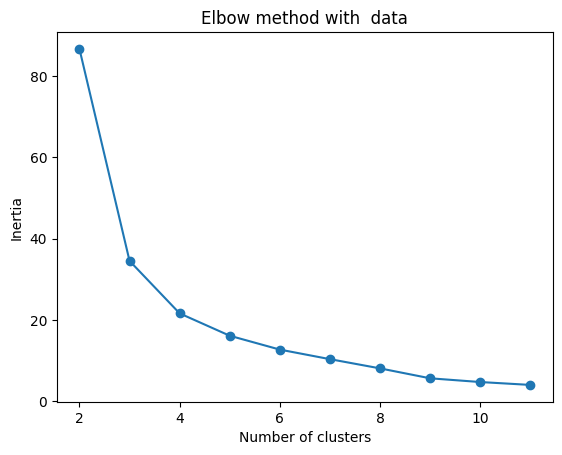

In [20]:
import matplotlib.pyplot as plt
inertias = []

for i in range(2,12):
    kmeans =  KMeans(n_clusters=i ).fit(X)
    inertias.append(kmeans.inertia_)
print("inertia = " ,inertias )
plt.plot(range(2,12), inertias, marker='o')
plt.title('Elbow method with  data')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()


In [21]:
!pip install kneed

In [22]:
from kneed import KneeLocator
kneedle = KneeLocator(range(1,11), inertias , curve = "convex" , direction = "decreasing")
kneedle.elbow

np.int64(3)

So it is very clear that 3 is the best K , so we have 3 clusters

In [23]:
kmeans =  KMeans(n_clusters=3).fit(X)
kmeans.inertia_


34.52961177861176

In [24]:
kmeans.labels_

array([2, 1, 2, ..., 1, 2, 1], dtype=int32)

In [25]:
set(list(kmeans.labels_))

{np.int32(0), np.int32(1), np.int32(2)}

inertia =  34.52961177861176


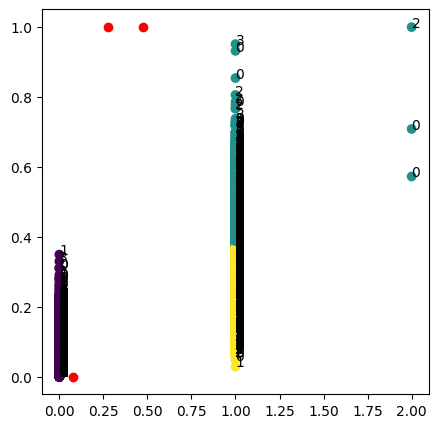

In [26]:
plt.figure(figsize=(5,5))
plt.scatter(  X["interest47"],X["grand_tot_interests"] , c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_ [:,0], kmeans.cluster_centers_ [:,1] ,c = "red")
for l,x,y in zip (Y  , X["interest47"],X["grand_tot_interests"] ):
    plt.annotate(l,xy=(x,y))
print ("inertia = " , kmeans.inertia_)


In [27]:
data

,group,grand_tot_interests,interest1,interest2,interest3,interest4,interest5,interest6,interest7,interest8,...,interest208,interest209,interest210,interest211,interest212,interest213,interest214,interest215,interest216,interest217
0,C,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C,43,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
2,C,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
3,C,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,NaN
4,C,36,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6335,I,53,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN
6336,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6337,I,48,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,NaN
6338,I,38,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,1.0,NaN
